In [16]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


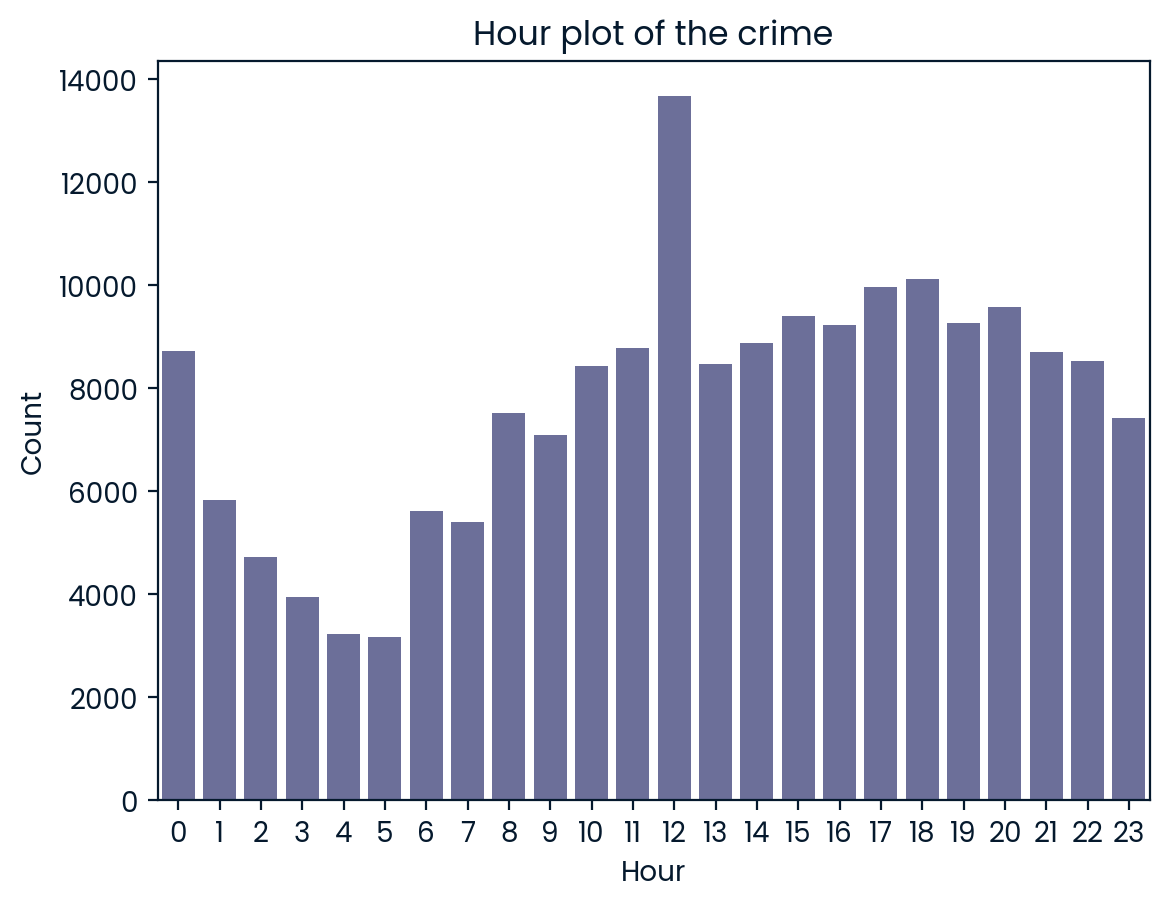

In [17]:
# Using String slicing to extract hour from the time occ
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)
# Countplot to visualise the hour frequencies
sns.countplot(x='HOUR OCC', data=crimes)
plt.title('Hour plot of the crime')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

In [18]:
peak_crime_hour = 12

In [19]:
# Filter for the night-time hours
night_time = crimes[crimes['HOUR OCC'].isin([22,23,0,1,2,3])]
# Grouped by AREA NAME and count occurences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC", ascending=False).iloc[0]['AREA NAME']
# Print the peak night crime location
print(f"The are with the largest volume of night crime is {peak_night_crime_location}.")

The are with the largest volume of night crime is Central.


In [20]:
# Create bins and labels for victim age ranges
age_bins =[0,17,25,34,44,54,64, np.inf]
age_labels =['0-17','18-25','26-34','35-44','45-54','55-64','65+']

# Add new column using pd.cut() to bin values into desired interval
crimes['Age Bracket'] = pd.cut(crimes['Vict Age'],bins=age_bins, labels=age_labels)

# Find category with the largest frequency
victim_ages = crimes['Age Bracket'].value_counts()
print(victim_ages)

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Age Bracket, dtype: int64
